# Ejemplo: cuándo jugar el tenis según Árboles de Decisión

Vamos a ver como se implementan los árboles de decisión con un código de ejemplo con el que se pretende tomar una decisión en una situación donde entra en juego las condiciones climáticas.

## Preparación del entorno

Importamos las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [10, 6]

## Dataset

Crearemos un dataset con ejemplos de condiciones climáticas y la decisión de jugar o no al tenis:

Primeros registros del dataset:


,Clima,Temperatura,Humedad,Viento,Jugar
0,Soleado,Caliente,Alta,No,No
1,Soleado,Caliente,Alta,Sí,No
2,Nublado,Caliente,Alta,No,Sí
3,Lluvia,Templado,Alta,No,Sí
4,Lluvia,Frío,Normal,No,Sí



Distribución de decisiones:


,count
Jugar,
Sí,9
No,5


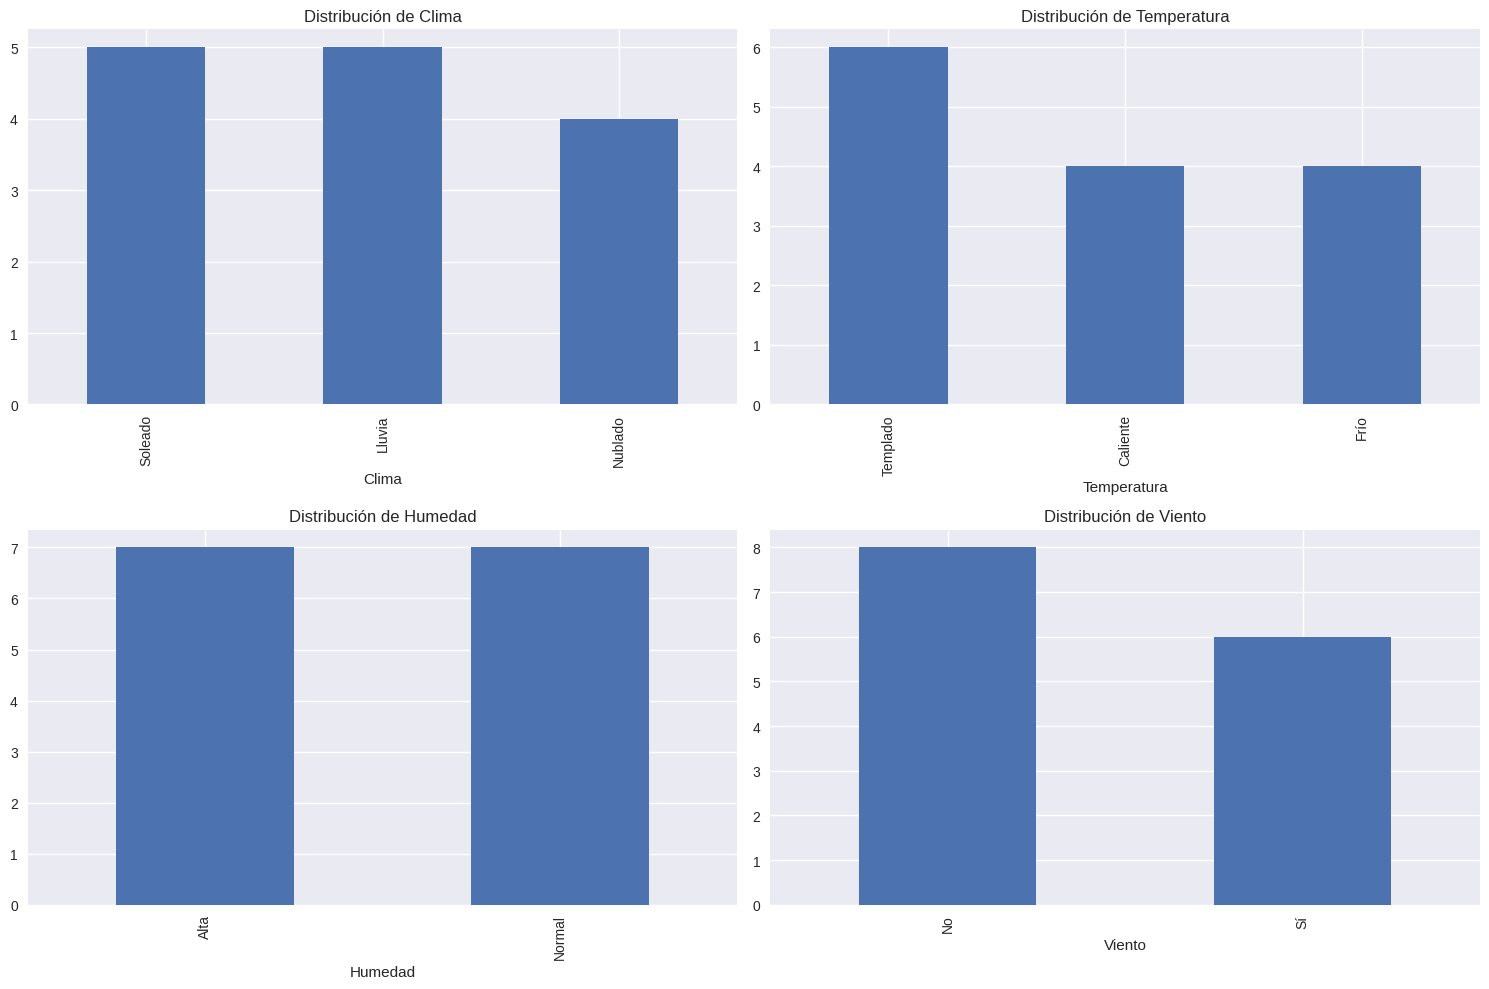

In [ ]:
# Datos de ejemplo
data = {
    'Clima': ['Soleado', 'Soleado', 'Nublado', 'Lluvia', 'Lluvia', 'Lluvia', 'Nublado',
              'Soleado', 'Soleado', 'Lluvia', 'Soleado', 'Nublado', 'Nublado', 'Lluvia'],
    'Temperatura': ['Caliente', 'Caliente', 'Caliente', 'Templado', 'Frío', 'Frío', 'Frío',
                   'Templado', 'Frío', 'Templado', 'Templado', 'Templado', 'Caliente', 'Templado'],
    'Humedad': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal',
                'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta'],
    'Viento': ['No', 'Sí', 'No', 'No', 'No', 'Sí', 'Sí',
               'No', 'No', 'No', 'Sí', 'Sí', 'No', 'Sí'],
    'Jugar': ['No', 'No', 'Sí', 'Sí', 'Sí', 'No', 'Sí',
              'No', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'No']
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar los primeros registros y estadísticas básicas
print("Primeros registros del dataset:")
display(df.head())

print("\nDistribución de decisiones:")
display(df['Jugar'].value_counts())

# Visualizar la distribución de características
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, column in enumerate(['Clima', 'Temperatura', 'Humedad', 'Viento']):
    ax = axes[i//2, i%2]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

## Preprocesamiento de datos

Convertiremos las variables categóricas a numéricas usando LabelEncoder

In [ ]:
# Codificar variables categóricas
le = LabelEncoder()
df_encoded = df.copy()

for column in df.columns:
    df_encoded[column] = le.fit_transform(df[column])

print("Dataset codificado:")
display(df_encoded.head())

# Preparar variables para el modelo
X = df_encoded.drop('Jugar', axis=1)
y = df_encoded['Jugar']

Dataset codificado:


,Clima,Temperatura,Humedad,Viento,Jugar
0,2,0,0,0,0
1,2,0,0,1,0
2,1,0,0,0,1
3,0,2,0,0,1
4,0,1,1,0,1


## Entrenamiento del modelo

Crearemos y entrenaremos nuestro árbol de decisión utilizando DecisonTreeClassifier

El clasificador va a seguir estos pasos:

1. Selecciona la mejor característica para dividir los datos
2. Evalúa todas las características (Clima, Temperatura, Humedad, Viento).
Usa un criterio (por defecto, Gini) para medir la "pureza" de las divisiones. Otras opciones son Entropía (criterion="entropy") y log_loss para problemas más avanzados.
3. Crea nodos basados en la mejor división encontrada
4. La característica que mejor separa las clases (reduce la impureza) se usa en el nodo raíz.
5. Después, el árbol sigue dividiendo los subconjuntos en ramas usando otras características.
6. Continúa hasta alcanzar max_depth=3

En este caso, el árbol solo tendrá 3 niveles de profundidad. Si max_depth fuera mayor o no estuviera especificado, el árbol seguiría creciendo hasta que no pudiera mejorar la clasificación.

In [ ]:
# Crear y entrenar el modelo
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X, y)

print("Score del modelo:", dt.score(X, y))

Score del modelo: 0.9285714285714286


## Visualización del árbol


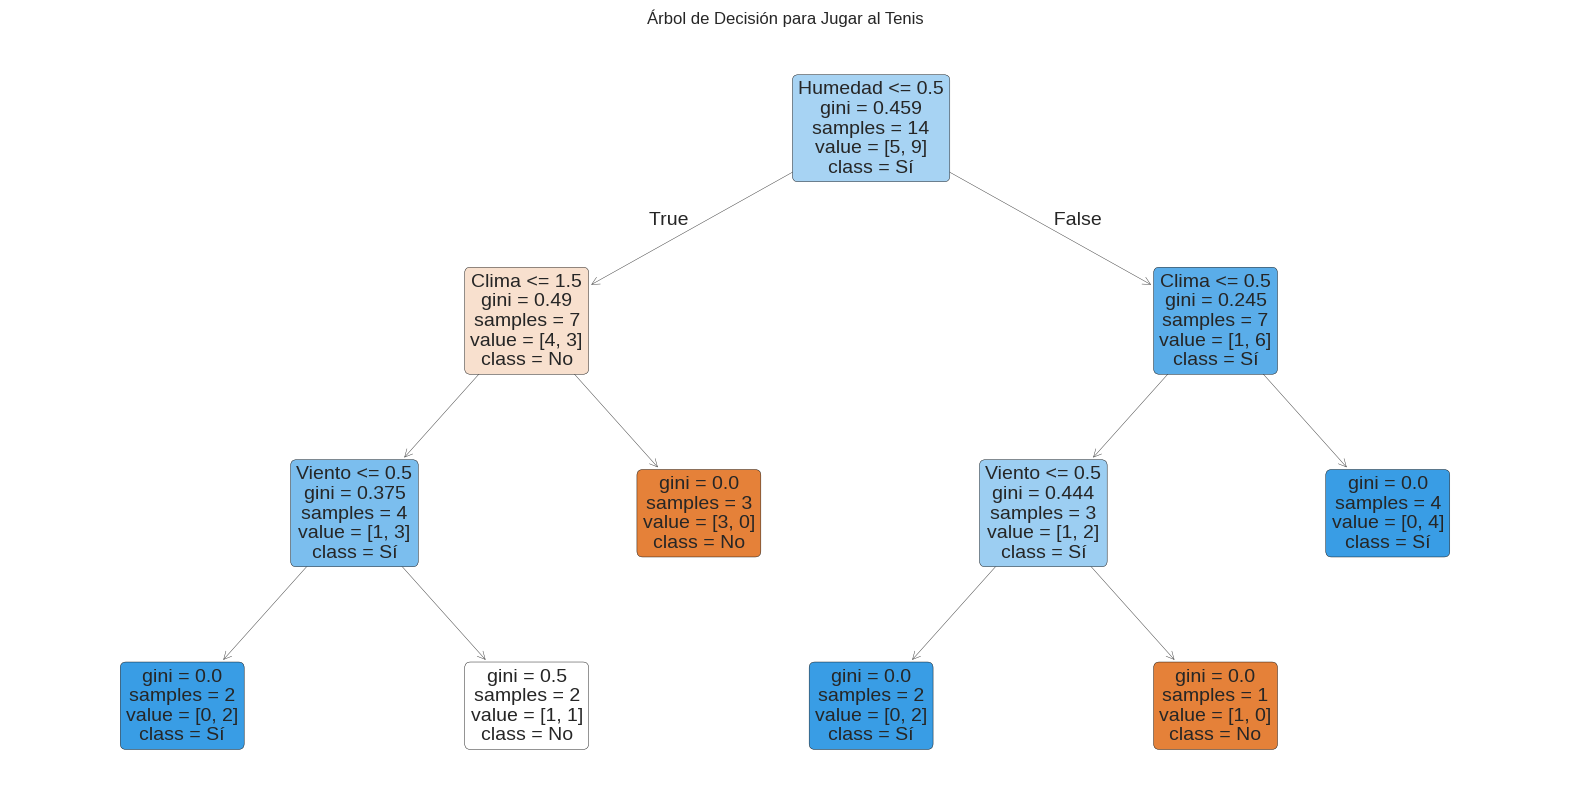

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt,
          feature_names=['Clima', 'Temperatura', 'Humedad', 'Viento'],
          class_names=['No', 'Sí'], # Mapea los 0s y 1s a no y sí
          filled=True,  # Rellena de color según el valor de la clase
          rounded=True, # Redondea los bordes
          fontsize=14)
plt.title('Árbol de Decisión para Jugar al Tenis')
plt.show()

## Predicciones y análisis

Ahora vamos a crear una función para hacer predicciones con nuevos datos:

In [ ]:
def predecir_jugar(clima, temperatura, humedad, viento):
    """Predice si jugar al tenis basado en las condiciones dadas."""
    # Mapeo de valores categóricos a numéricos
    clima_map = {'Soleado': 2, 'Nublado': 0, 'Lluvia': 1}
    temp_map = {'Caliente': 0, 'Templado': 2, 'Frío': 1}
    humedad_map = {'Alta': 0, 'Normal': 1}
    viento_map = {'No': 0, 'Sí': 1}

    # Crear array para predicción
    nuevo_caso = np.array([
        [clima_map[clima],
         temp_map[temperatura],
         humedad_map[humedad],
         viento_map[viento]]
    ])

    # Realizar predicción
    prediccion = dt.predict(nuevo_caso)
    probabilidad = dt.predict_proba(nuevo_caso)

    return 'Sí' if prediccion[0] == 1 else 'No', probabilidad[0]

# Ejemplo de uso
condiciones_prueba = [
    {'clima': 'Soleado', 'temperatura': 'Templado', 'humedad': 'Normal', 'viento': 'No'},
    {'clima': 'Lluvia', 'temperatura': 'Frío', 'humedad': 'Alta', 'viento': 'Sí'},
    {'clima': 'Nublado', 'temperatura': 'Caliente', 'humedad': 'Normal', 'viento': 'No'}
]

for i, cond in enumerate(condiciones_prueba, 1):
    decision, prob = predecir_jugar(**cond)
    print(f"\nCaso {i}:")
    print(f"Condiciones: {cond}")
    print(f"Decisión: {decision}")
    print(f"Probabilidad No: {prob[0]:.2f}")
    print(f"Probabilidad Sí: {prob[1]:.2f}")


Caso 1:
Condiciones: {'clima': 'Soleado', 'temperatura': 'Templado', 'humedad': 'Normal', 'viento': 'No'}
Decisión: Sí
Probabilidad No: 0.00
Probabilidad Sí: 1.00

Caso 2:
Condiciones: {'clima': 'Lluvia', 'temperatura': 'Frío', 'humedad': 'Alta', 'viento': 'Sí'}
Decisión: No
Probabilidad No: 0.50
Probabilidad Sí: 0.50

Caso 3:
Condiciones: {'clima': 'Nublado', 'temperatura': 'Caliente', 'humedad': 'Normal', 'viento': 'No'}
Decisión: Sí
Probabilidad No: 0.00
Probabilidad Sí: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

## Importancia de las características

Analizaremos qué características son más importantes para la decisión:

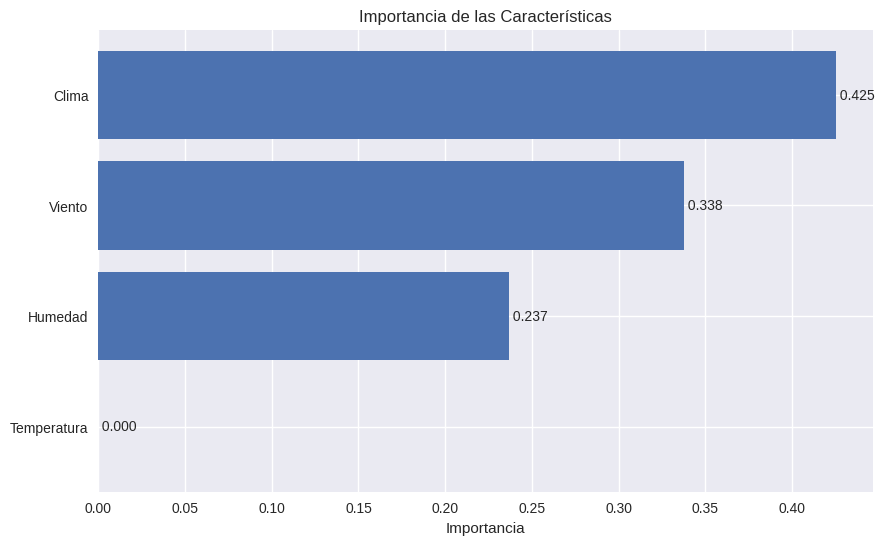

In [ ]:
# Calcular y visualizar la importancia de las características
importancia = pd.DataFrame({
    'Característica': ['Clima', 'Temperatura', 'Humedad', 'Viento'],
    'Importancia': dt.feature_importances_
})

importancia = importancia.sort_values('Importancia', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importancia['Característica'], importancia['Importancia'])
plt.title('Importancia de las Características')
plt.xlabel('Importancia')

# Añadir valores en las barras
for i, v in enumerate(importancia['Importancia']):
    plt.text(v, i, f' {v:.3f}', va='center')

plt.show()